In [4]:
#import libraries 
#import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/USA Gun Violence Project/'

In [6]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [13]:
#import gun violence data 
df = pd.read_csv(os.path.join(path,'gun_laws_merged.csv'))

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_11638/1150722495.py:2: DtypeWarning: Columns (0,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,'gun_laws_merged.csv'))


In [8]:
#import population data 
df2 =  pd.read_csv(os.path.join(path,'census population count.csv'))

In [14]:
df.dtypes

incident_id        object
date               object
state              object
city_or_county     object
address            object
                   ...   
violentpartial      int64
waiting             int64
waitingh            int64
lawtotal            int64
percent           float64
Length: 169, dtype: object

In [23]:
# Remove categorical columns 
columns_to_remove = ['incident_id', 'date', 'state', 'city_or_county','state_house_district', 'state_senate_district','address', 'gun_stolen', 'gun_type', 'incident_characteristics', 'location_description', 'notes', 'participant_age', 'participant_age_group', 'participant_gender', 'participant_status', 'participant_type', 'sources', 'geometry', 'region', 'participant_age_dic', 'participant_type_dic', 'participant_gender_dic' 
                ]
df.drop(columns=columns_to_remove, inplace=True)

KeyError: "['incident_id', 'date', 'state', 'city_or_county', 'address', 'gun_stolen', 'gun_type', 'incident_characteristics', 'location_description', 'notes', 'participant_age', 'participant_age_group', 'participant_gender', 'participant_status', 'participant_type', 'sources', 'geometry', 'region', 'participant_age_dic', 'participant_type_dic', 'participant_gender_dic'] not found in axis"

In [16]:
df_cleaned = df.dropna()

In [17]:
# Convert n_guns_involved from float to integer
df_cleaned['n_guns_involved'] = df_cleaned['n_guns_involved'].astype(int)

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_11638/835558269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['n_guns_involved'] = df_cleaned['n_guns_involved'].astype(int)


In [19]:
df_cleaned.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,year,month,monthday,weekday,total,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,amm21h,ammbackground,ammlicense,ammpermit,ammrecords,ammrestrict,assault,assaultlist,assaultregister,assaulttransfer,backgroundpurge,cap14,cap16,cap18,capaccess,capliability,capunloaded,capuses,ccbackground,ccbackgroundnics,ccrenewbackground,ccrevoke,college,collegeconcealed,danger,dealer,dealerh,defactoreg,defactoregh,drugmisdemeanor,dvro,dvrodating,dvroremoval,dvrosurrender,dvrosurrenderdating,dvrosurrendernoconditions,elementary,exparte,expartedating,expartesurrender,expartesurrenderdating,expartesurrendernoconditions,felony,fingerprint,gunshow,gunshowh,gvro,gvrolawenforcement,immunity,incidentall,incidentremoval,inspection,invcommitment,invoutpatient,junkgun,liability,lockd,locked,lockp,lockstandards,loststolen,magazine,magazinepreowned,mayissue,mcdv,mcdvdating,mcdvremovalallowed,mcdvremovalrequired,mcdvsurrender,mcdvsurrenderdating,mcdvsurrendernoconditions,mentalhealth,microstamp,nosyg,onefeature,onepermonth,opencarryh,opencarryl,opencarrypermith,opencarrypermitl,permit,permitconcealed,permith,permitlaw,personalized,preemption,preemptionbroad,preemptionnarrow,purge,recordsall,recordsallh,recordsdealer,recordsdealerh,registration,registrationh,reportall,reportallh,reportdealer,reportdealerh,residential,security,showing,stalking,statechecks,statechecksh,strawpurchase,strawpurchaseh,tenroundlimit,theft,threedaylimit,traffickingbackground,traffickingprohibited,traffickingprohibitedh,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal,percent
7,1,0,2,39.9669,-75.2229,1,190.0,7.0,2013,8,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669
10,1,0,4,39.9672,-76.7206,1,95.0,28.0,2013,8,17,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669
12,1,0,17,41.2350,-75.9011,1,121.0,14.0,2013,10,13,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669
16,0,1,2,39.9683,-75.2238,1,190.0,7.0,2013,11,22,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669
17,0,1,2,39.9669,-75.2229,1,190.0,7.0,2013,11,22,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669


In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
columns_with_hyphen = df_cleaned.columns[df_cleaned.isin(['-']).any()].tolist()
print("Columns with hyphen:", columns_with_hyphen)

Columns with hyphen: ['state_house_district', 'state_senate_district']


In [30]:
# Remove categorical columns 
columns_to_remove = ['state_house_district', 'state_senate_district']
df_cleaned.drop(columns=columns_to_remove, inplace=True)

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_11638/3200113182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=columns_to_remove, inplace=True)


In [31]:
score = [kmeans[i].fit(df_cleaned).score(df_cleaned) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/wenboyang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wenboyang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wenboyang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wenboyang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

[-196458554.70786664,
 -66373677.8974729,
 -44597792.68869512,
 -36975608.22249125,
 -32169727.32661853,
 -29598979.328268304,
 -27276376.900513034,
 -25311479.53472479,
 -23389636.324145578]

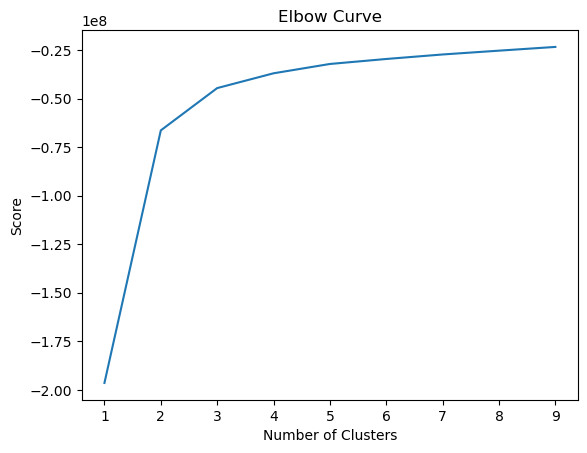

In [33]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will be using 4 clusters as this is where the curve begins to flatten out. I also tried using 4 and 5 clusters and the groupings were not as visible. 

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [35]:
# Fit the k-means object to the data.

kmeans.fit(df_cleaned)

/Users/wenboyang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned)

/Users/wenboyang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_11638/3459620578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned)


In [37]:
df_cleaned['clusters'].value_counts()

0    72010
1    21913
2     8363
Name: clusters, dtype: int64

In [38]:
df_cleaned.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,year,month,monthday,weekday,total,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,alctreatment,amm18,amm21h,ammbackground,ammlicense,ammpermit,ammrecords,ammrestrict,assault,assaultlist,assaultregister,assaulttransfer,backgroundpurge,cap14,cap16,cap18,capaccess,capliability,capunloaded,capuses,ccbackground,ccbackgroundnics,ccrenewbackground,ccrevoke,college,collegeconcealed,danger,dealer,dealerh,defactoreg,defactoregh,drugmisdemeanor,dvro,dvrodating,dvroremoval,dvrosurrender,dvrosurrenderdating,dvrosurrendernoconditions,elementary,exparte,expartedating,expartesurrender,expartesurrenderdating,expartesurrendernoconditions,felony,fingerprint,gunshow,gunshowh,gvro,gvrolawenforcement,immunity,incidentall,incidentremoval,inspection,invcommitment,invoutpatient,junkgun,liability,lockd,locked,lockp,lockstandards,loststolen,magazine,magazinepreowned,mayissue,mcdv,mcdvdating,mcdvremovalallowed,mcdvremovalrequired,mcdvsurrender,mcdvsurrenderdating,mcdvsurrendernoconditions,mentalhealth,microstamp,nosyg,onefeature,onepermonth,opencarryh,opencarryl,opencarrypermith,opencarrypermitl,permit,permitconcealed,permith,permitlaw,personalized,preemption,preemptionbroad,preemptionnarrow,purge,recordsall,recordsallh,recordsdealer,recordsdealerh,registration,registrationh,reportall,reportallh,reportdealer,reportdealerh,residential,security,showing,stalking,statechecks,statechecksh,strawpurchase,strawpurchaseh,tenroundlimit,theft,threedaylimit,traffickingbackground,traffickingprohibited,traffickingprohibitedh,training,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal,percent,clusters
7,1,0,2,39.9669,-75.2229,1,2013,8,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669,0
10,1,0,4,39.9672,-76.7206,1,2013,8,17,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669,0
12,1,0,17,41.2350,-75.9011,1,2013,10,13,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669,0
16,0,1,2,39.9683,-75.2238,1,2013,11,22,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669,0
17,0,1,2,39.9669,-75.2229,1,2013,11,22,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,36,27.067669,0


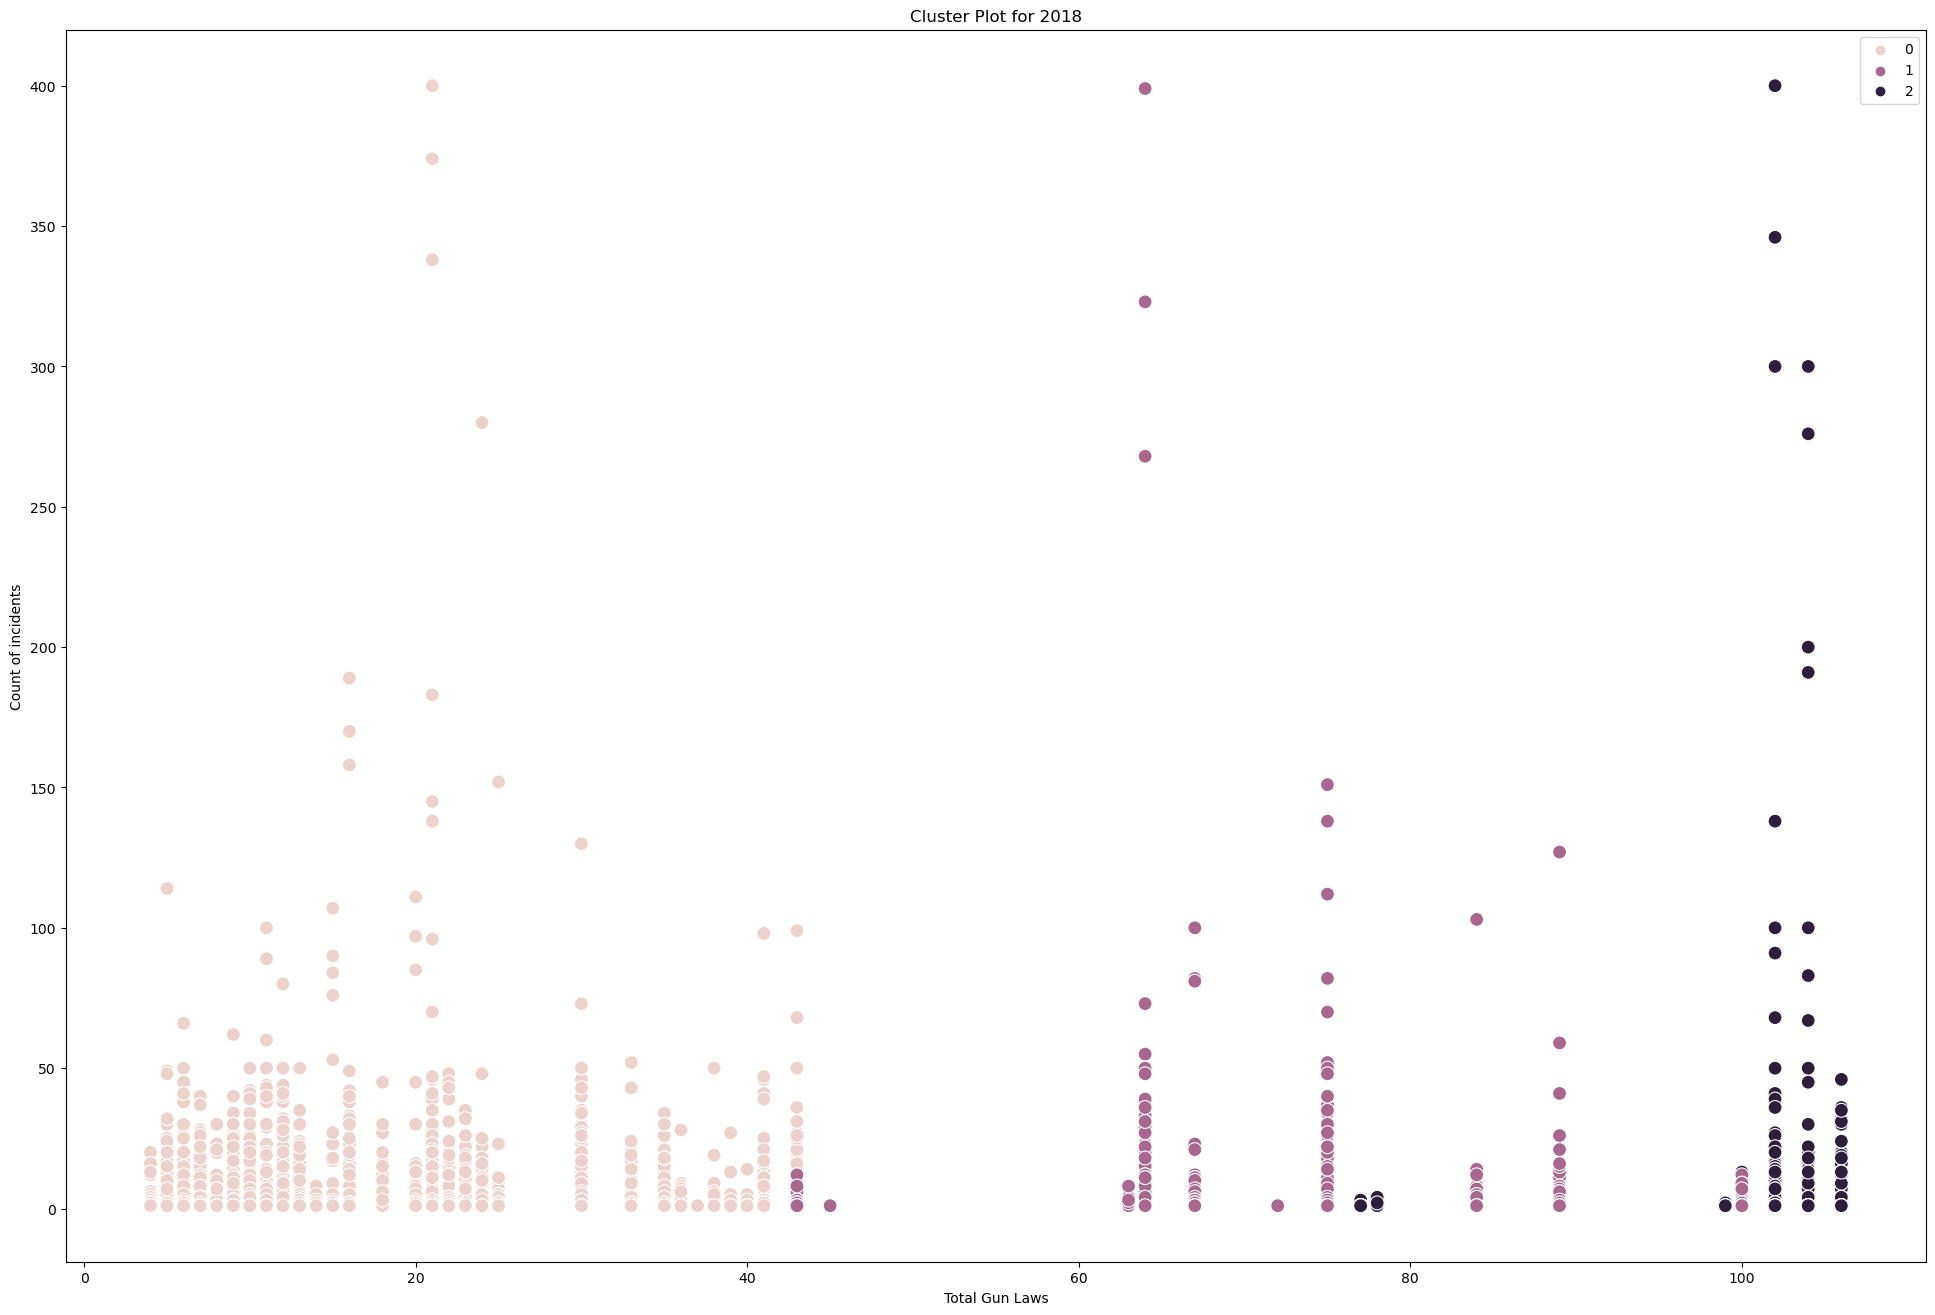

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot the clusters for the "total" and "lawtotal" variables.
plt.figure(figsize=(24,16))
ax = sns.scatterplot(y=df_cleaned['n_guns_involved'], x=df_cleaned['lawtotal'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.ylabel('Count of incidents')
plt.xlabel('Total Gun Laws')
plt.title('Cluster Plot for 2018')  # Add a title to the plot
plt.show()

# Specify the filename and format
filename = 'scatter_incidents_lawtotal_2018.jpg'

# Save the plot as a JPEG file
plt.savefig(filename, format='jpeg')

In [41]:
# Plot the clusters for the "n_guns_involved" and "state_house_district" variables.

plt.figure(figsize=(24,16))
ax = sns.scatterplot(x=df_cleaned['n_guns_involved'], y=df_cleaned['state_house_district'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Guns Involved') # Label x-axis.
plt.ylabel('State House District') # Label y-axis.
plt.show()


# Specify the filename and format
filename = 'scatter_guns_statehouse.jpg'

scatterplot.figure.savefig(os.path.join(filename))

KeyError: 'state_house_district'

<Figure size 2400x1600 with 0 Axes>

The clusters indicate that incidents with more guns involved typically occur within the second and third clusters.  The third cluster is only associated with guns under an amount of 10 and State Senate District 400 and higher. This could indicate that the region of the country can have influence on how many guns are typically involved in an incident. 

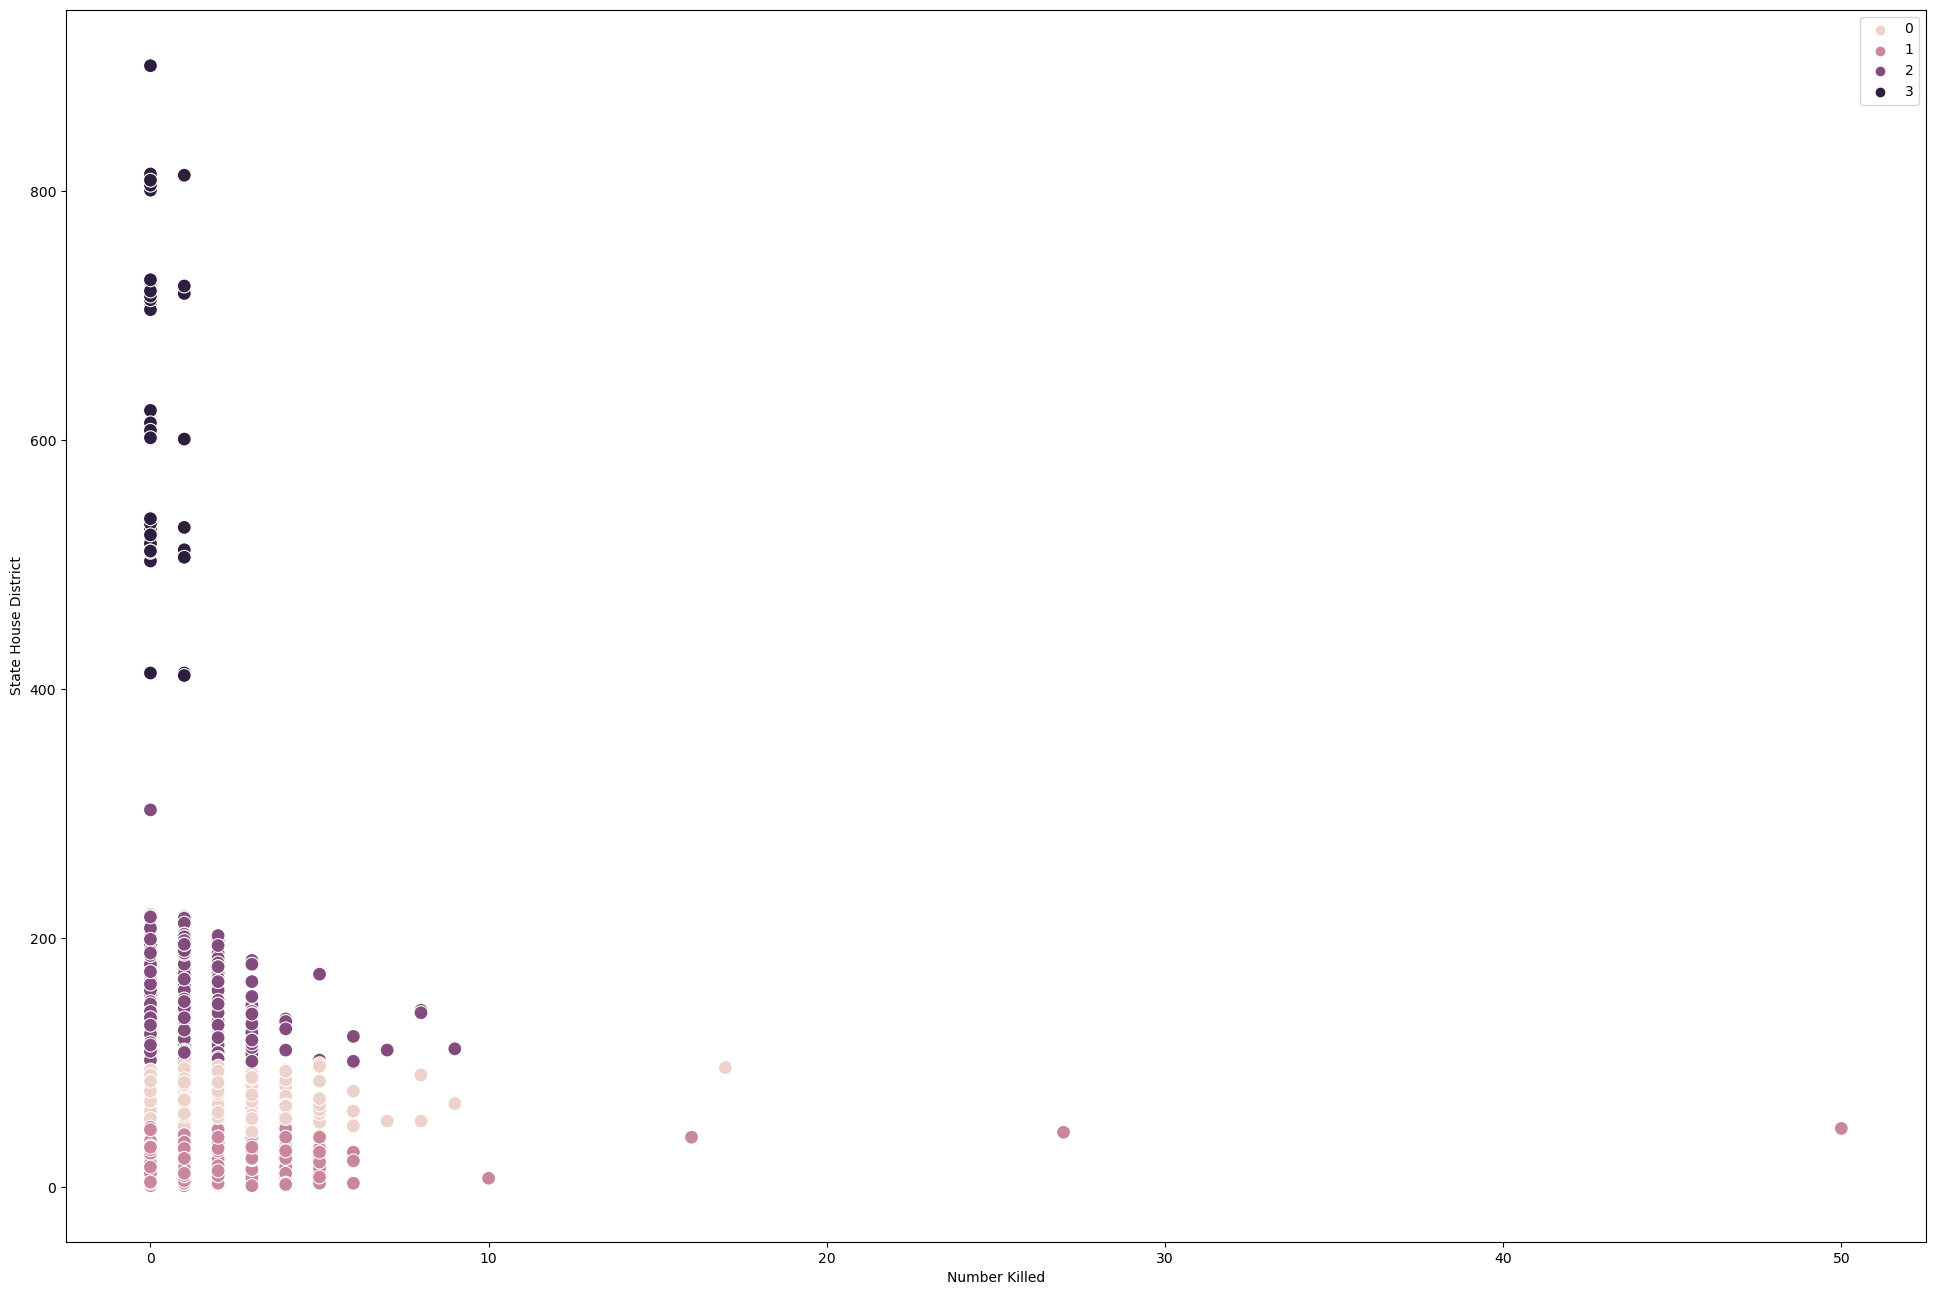

In [21]:
# Plot the clusters for the "number_killed" and "state_house_district" variables.

plt.figure(figsize=(24,16))
ax = sns.scatterplot(x=df_cleaned['n_killed'], y=df_cleaned['state_house_district'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number Killed') # Label x-axis.
plt.ylabel('State House District') # Label y-axis.
plt.show()

The most deaths are found in the second and fourth clusters and the the third cluster has no data points in deaths over 10. 

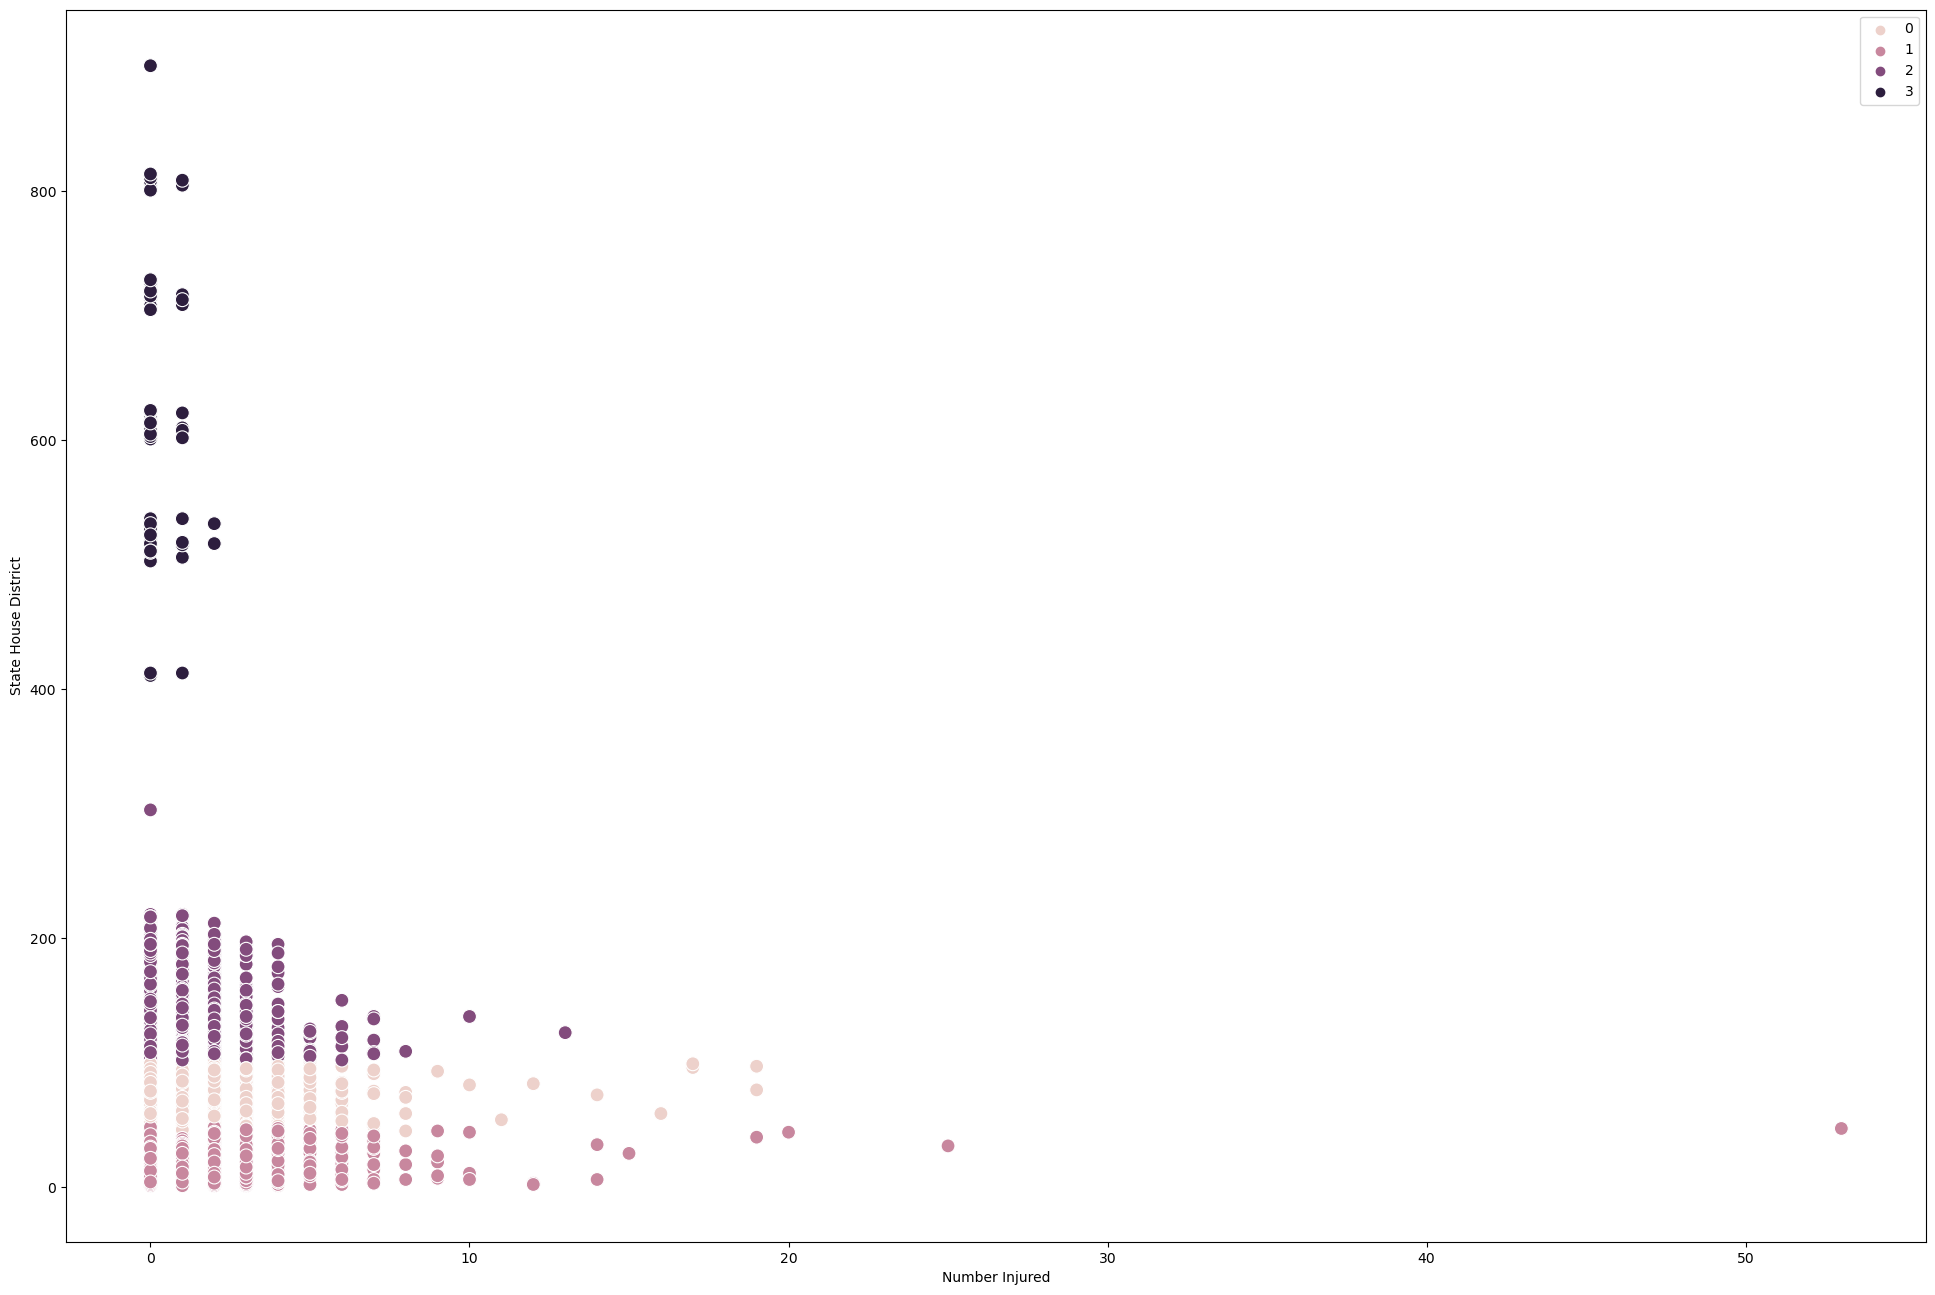

In [22]:
# Plot the clusters for the "n_injured" and "state_house_district" variables.

plt.figure(figsize=(24,16))
ax = sns.scatterplot(x=df_cleaned['n_injured'], y=df_cleaned['state_house_district'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number Injured') # Label x-axis.
plt.ylabel('State House District') # Label y-axis.
plt.show()

The data for injuries and state house district looks similar to the scatterplot between deaths and state house district. 

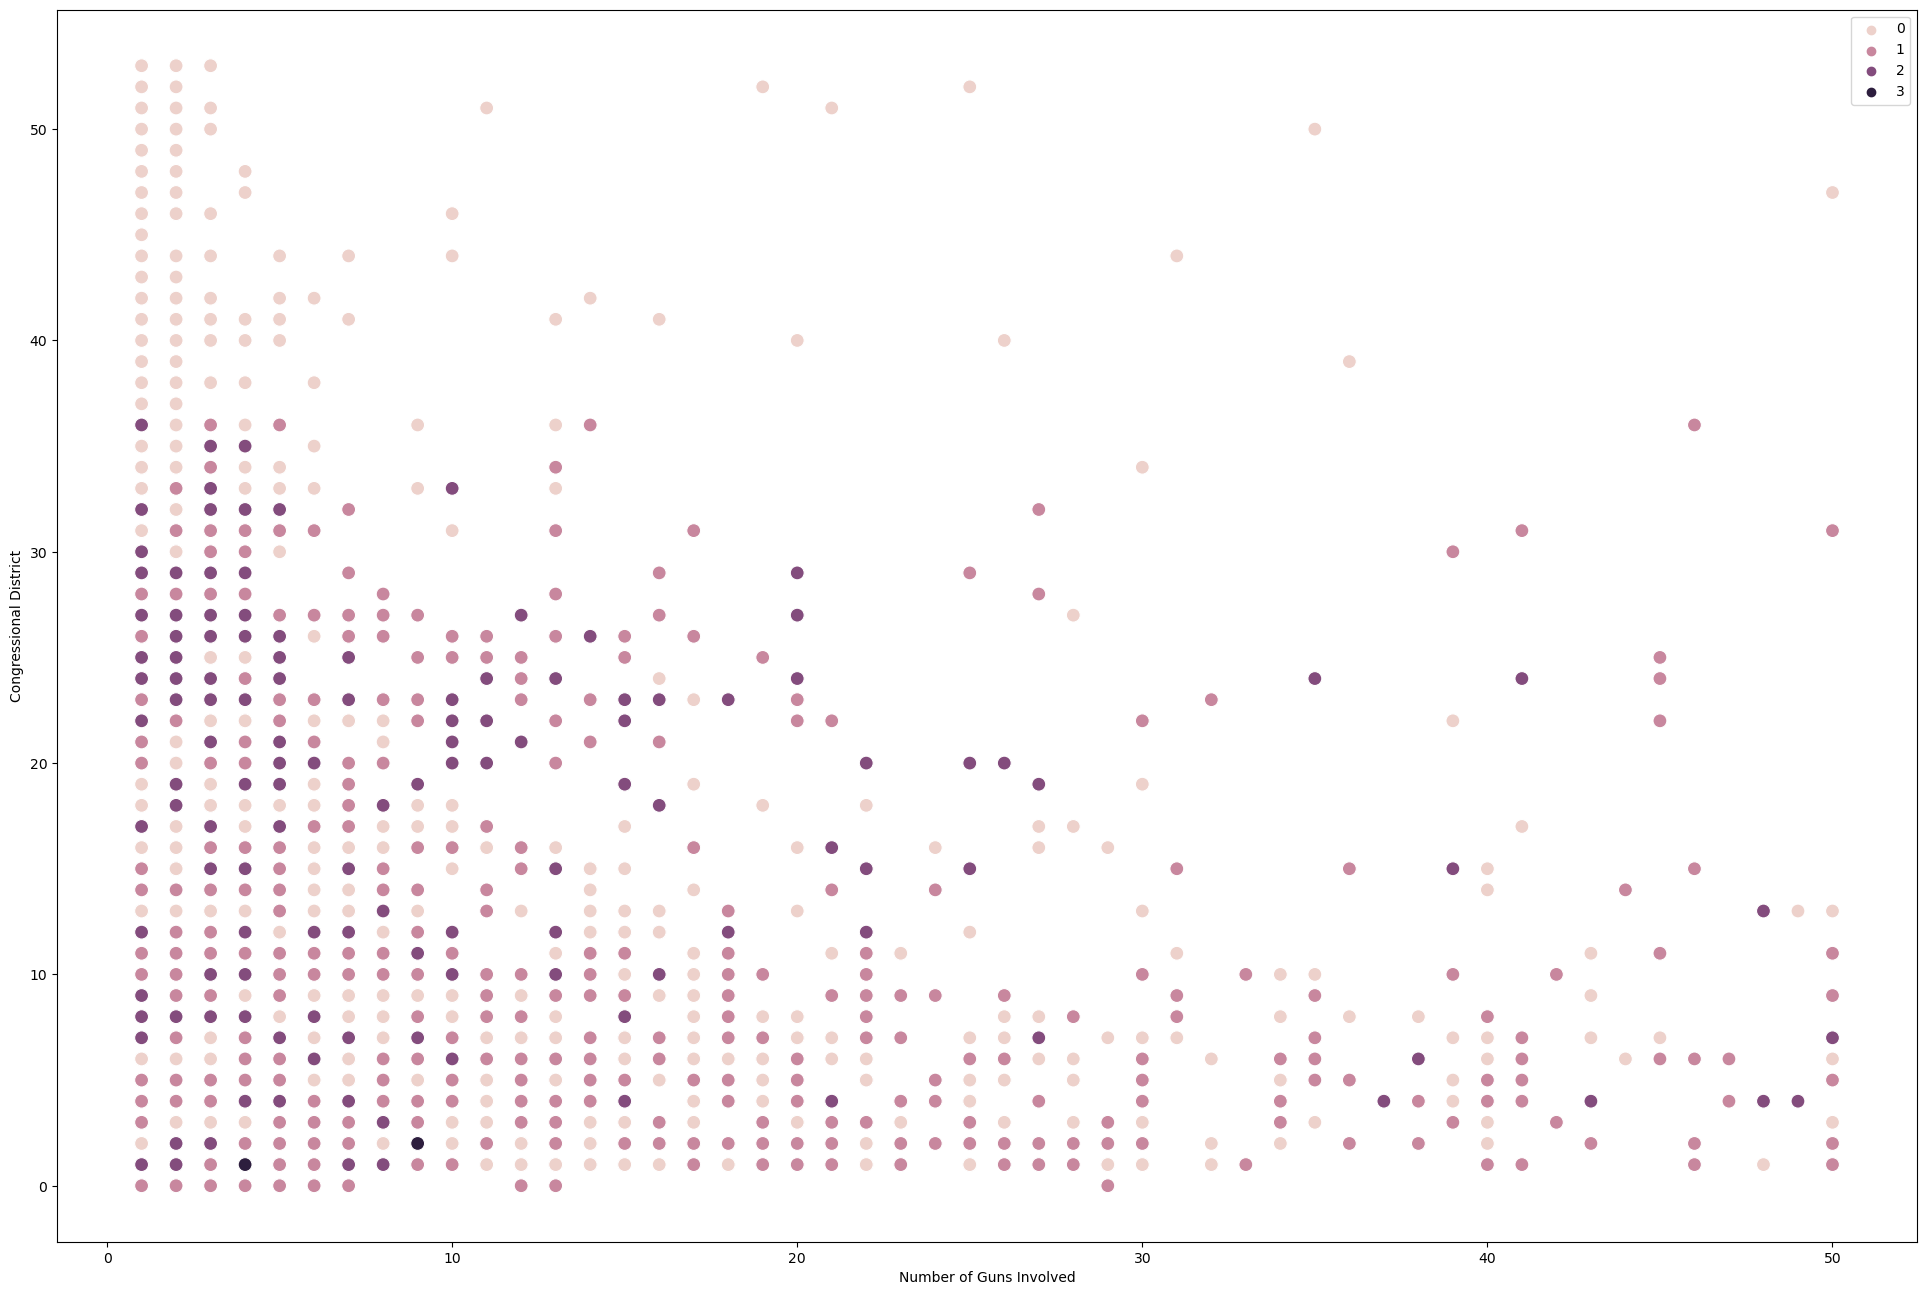

In [23]:
# Plot the clusters for the "n_guns_involved" and "congressional_district" variables.

plt.figure(figsize=(24,16))
ax = sns.scatterplot(x=df_cleaned['n_guns_involved'], y=df_cleaned['congressional_district'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Guns Involved') # Label x-axis.
plt.ylabel('Congressional District') # Label y-axis.
plt.show()

The results from this graph do not show any intuitive clustering. Everything looks all over the place and it is hard to interpret. 

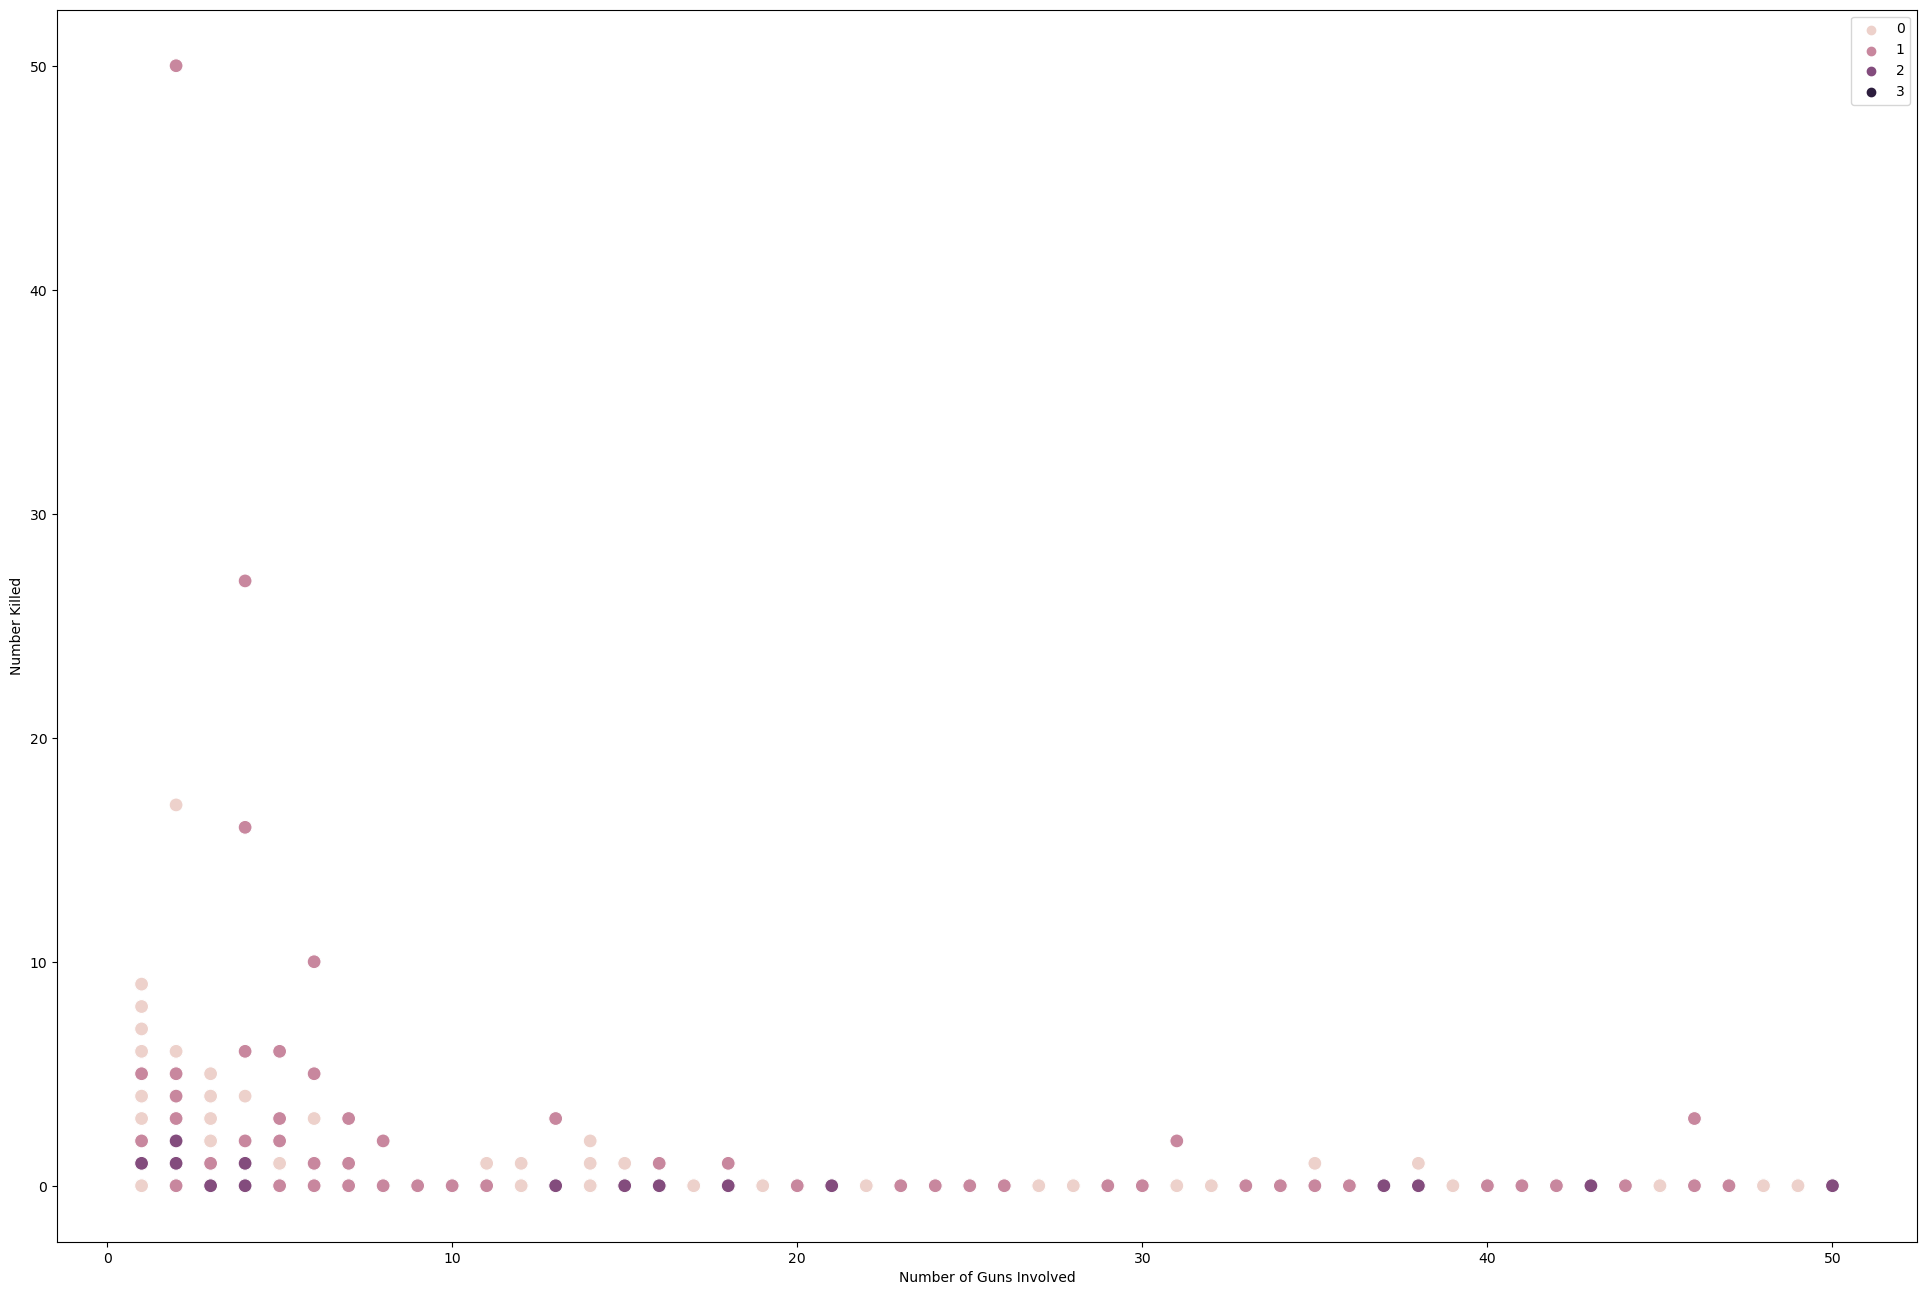

In [24]:
# Plot the clusters for the "n_guns_involved" and "n_killed" variables.

plt.figure(figsize=(24, 16))
ax = sns.scatterplot(x=df_cleaned['n_guns_involved'], y=df_cleaned['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Guns Involved') # Label x-axis.
plt.ylabel('Number Killed') # Label y-axis.
plt.show()

The clusters in this graph do not indicate any clear pattern. It possibly indicates that there is no clear correlation between number of guns involved and number of deaths. 

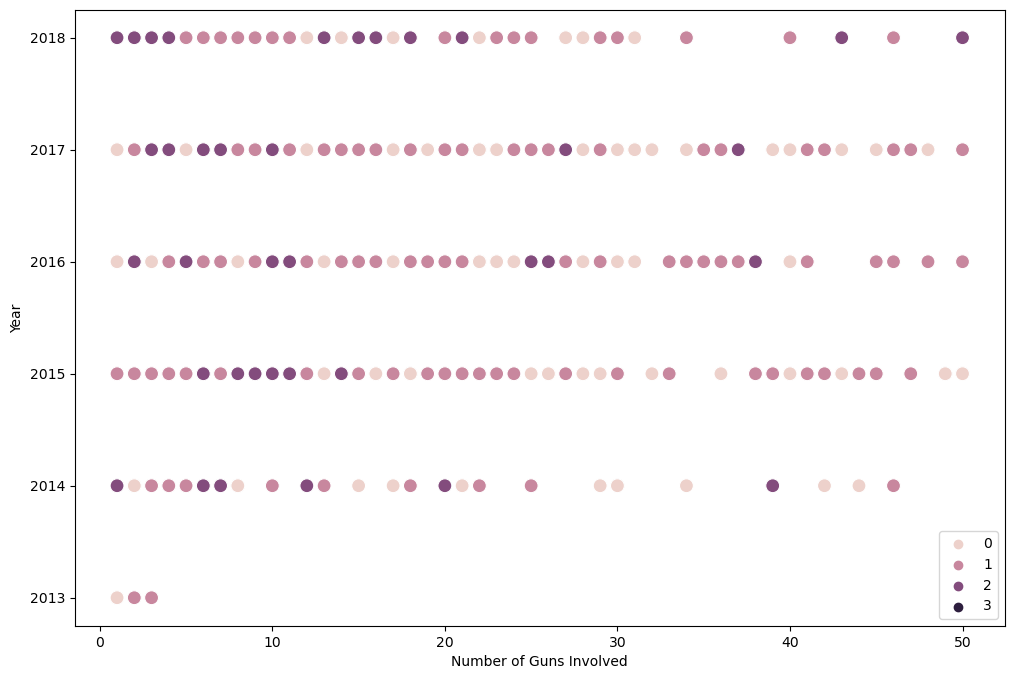

In [25]:
# Plot the clusters for the "n_guns_involved" and "year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned['n_guns_involved'], y=df_cleaned['year'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Guns Involved') # Label x-axis.
plt.ylabel('Year') # Label y-axis.
plt.show()

In 2013 there are no incidents from the first and third clusters. There are also significantly less dots in 2013 which may indicate lack of data from that year. Overall in every year there are more dots corresponding to the second and fourth clusters.

Calculate summary statistics

In [26]:
df.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,year,month,monthday,weekday,total
0,0,0,4,40.2597,-76.8500,50.0,NaN,NaN,2014,10,18,5,0
1,0,0,1,39.1600,-75.5233,50.0,31.0,17.0,2015,4,22,2,0
2,0,0,47,33.8162,-118.0960,50.0,70.0,33.0,2015,6,25,3,0
3,0,0,5,40.0923,-85.6657,50.0,36.0,25.0,2015,8,13,3,0
4,0,0,7,40.6938,-73.9913,50.0,52.0,26.0,2015,10,22,3,0


In [27]:
#grouping by 'cluster' colors and calculating statistics

df_cleaned.groupby('clusters').agg({'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'congressional_district':['mean', 'median'],
                          'latitude':['mean', 'median'],
                          'longitude':['mean', 'median'],
                                'n_guns_involved':['mean','median'],
                                'state_house_district':['mean','median'],
                                'state_senate_district':['mean','median'],
                                'year':['mean','median'],
                                'month':['mean','median'],
                                'monthday':['mean','median'],
                                'weekday':['mean','median'],
                                'total':['mean','median']})

n_killed        n_injured        congressional_district         \
              mean median      mean median                   mean median   
clusters                                                                   
0         0.258388    0.0  0.451335    0.0               9.115450    6.0   
1         0.248281    0.0  0.487054    0.0               6.325275    4.0   
2         0.224943    0.0  0.411402    0.0              12.784181   11.0   
3         0.095745    0.0  0.202128    0.0               1.340426    1.0   

           latitude            longitude           n_guns_involved         \
               mean    median       mean    median            mean median   
clusters                                                                    
0         36.331629  36.16985 -88.241038 -86.81900        1.293162    1.0   
1         38.434567  39.31835 -93.620120 -87.65845        1.286418    1.0   
2         36.064943  35.26400 -83.025030 -81.11020        1.275640    1.0   
3         43.076770  42.99740 -71.363300 -71.45030        1.265957    1.0   

         state_house_district        state_senate_district         \
                         mean median                  mean median   
clusters                                                            
0                   73.478015   74.0             25.198132   27.0   
1                   21.804944   21.0             13.860413   11.0   
2                  128.849763  123.0             32.423064   33.0   
3                  610.180851  602.5             15.595745   18.0   

                 year             month          monthday          weekday  \
                 mean  median      mean median       mean median      mean   
clusters                                                                     
0         2016.401815  2017.0  6.424582    7.0  15.774895   16.0  2.994180   
1         2016.381710  2017.0  6.454266    7.0  15.821697   16.0  3.057803   
2         2016.344447  2017.0  6.525348    7.0  15.727722   16.0  3.033272   
3         2017.265957  2017.0  6.521277    7.5  16.095745   16.0  3.063830   

                    total         
         median      mean median  
clusters                          
0           3.0  0.709723    1.0  
1           3.0  0.735334    1.0  
2           3.0  0.636345    1.0  
3           3.0  0.297872    0.0

The summary statistics show that the clusters appear to be grouped by state house district. In future analysis I will need to look more closely at the correlation between gun incidents and state house district and perhaps look at the number of gun laws that are in place in each district. I also want to incorporate population numbers into my dataframe to see the correlation. Overall it appears that politics and gun laws may have the most influence on number of deaths and number of guns involved in an incident. 